In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\Андрей Клычев\\Desktop\\Учеба\\Feature Engineering\\3. Feature Selection'

In [21]:
data = pd.read_csv('aac_shelter_outcomes.csv')

In [22]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,2018-02-01T18:26:00,NaN,Foster,Adoption,Spayed Female
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,2018-02-01T18:08:00,NaN,Rabies Risk,Euthanasia,Unknown
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,NaN,NaN,Adoption,Spayed Female


In [4]:
from datetime import datetime
from datetime import timedelta


Первая гипотеза: возраст имеет значение - чем животное старше, тем вероятнее его заберут из приюта, оставим только столбец "age", полученный из 'datetime' и 'date_of_birth'   

In [23]:
data = data.drop('monthyear', axis=1)
data.name = data.name.fillna('animal')

In [24]:
def age_(row):
    return (datetime.strptime(row['datetime'], '%Y-%m-%dT%H:%M:%S') \
    - datetime.strptime(row['date_of_birth'], '%Y-%m-%dT%H:%M:%S')).days/365

In [25]:
data['age'] = data.apply(age_, axis=1)
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
10753,1 year,A671017,Other,Fox Mix,Brown/Black,2013-01-17T00:00:00,2014-01-20T08:27:00,animal,NaN,NaN,Unknown,1.008219
13270,0 years,A674209,Other,Bat Mix,Brown,2014-03-09T00:00:00,2014-03-09T18:15:00,animal,NaN,NaN,Unknown,0.000000
13302,4 weeks,A679066,Other,Rabbit Sh,Brown,2014-04-16T00:00:00,2014-05-16T00:00:00,animal,NaN,NaN,Unknown,0.082192
16951,1 year,A686025,Other,Bat Mix,Brown,2013-08-15T00:00:00,2014-08-16T08:35:00,animal,NaN,NaN,Unknown,1.002740
29214,1 year,A744013,Other,Bat Mix,Black,2016-02-21T00:00:00,2017-02-24T09:00:00,animal,NaN,NaN,Unknown,1.010959
64626,1 month,A755711,Cat,Domestic Shorthair Mix,Black,2017-07-06T00:00:00,2017-08-21T10:09:00,*Dewey,NaN,NaN,Intact Male,0.126027
68246,NaN,A737705,Dog,Labrador Retriever Mix,Black/White,2013-11-02T00:00:00,2016-11-19T16:35:00,*Heddy,NaN,NaN,NaN,3.049315
69847,1 month,A755715,Cat,Domestic Shorthair Mix,Black Smoke,2017-06-29T00:00:00,2017-08-21T10:09:00,*Louie,NaN,NaN,Intact Female,0.145205
72037,1 month,A755716,Cat,Domestic Shorthair Mix,Blue,2017-07-06T00:00:00,2017-08-21T10:09:00,*Huey,NaN,NaN,Intact Female,0.126027
76709,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,2005-12-20T00:00:00,2016-03-26T00:00:00,Bailey,NaN,NaN,Neutered Male,10.271233


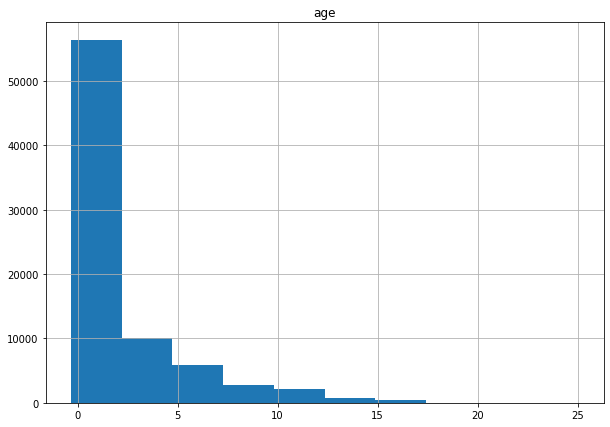

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 7]
data.hist('age')
data[data.outcome_type.isna() == True]

Большинство все же в возрасте до 3 лет, однако, продолжительность жиз ни у животных разная. Определим типы животных, найдем информацию о среденей продлжительности их жизни, и определим относительный возраст разных групп животных.

In [26]:
data = data.dropna(subset=['outcome_type', 'sex_upon_outcome'])
data.outcome_type.isna().sum()
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


In [10]:
# codes, uniques = pd.factorize(data.outcome_type)
# codes1, uniques1 = pd.factorize(data.animal_type)
# # Не тык

In [11]:
# names = np.array(uniques)
# names1 = np.array(uniques1)
# # Не тык

In [20]:
# data.outcome_type = codes
# data.animal_type = codes1
# #  Не тык

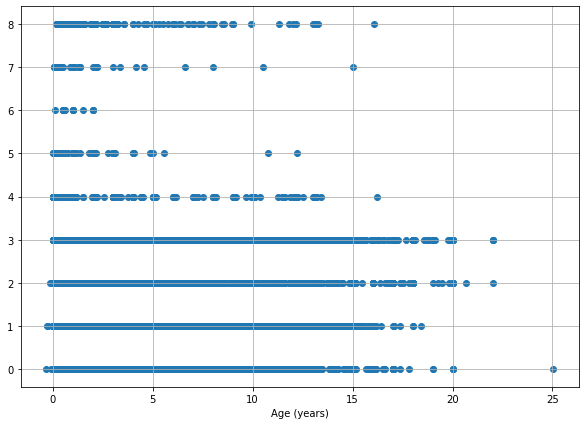

In [13]:
plt.scatter(data.age, data.outcome_type)
plt.xlabel('Age (years)')
plt.grid()
plt.show()

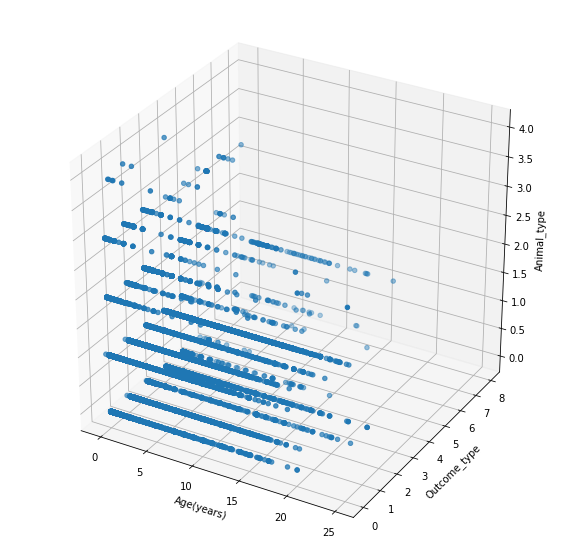

In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(data.age, data.outcome_type, data.animal_type)
ax.set_xlabel('Age(years)')
ax.set_ylabel('Outcome_type')
ax.set_zlabel('Animal_type')
plt.show()

In [27]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


In [16]:
data.animal_type.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [28]:
sns.barplot(x=data_cat.breed.value_counts().head(10)/len(data_cat.breed), y=data_cat.breed.value_counts().head(10).index)
plt.show()
# Надо отобрать отдельо собак, кошек, и пр животных

ValueError: min() arg is an empty sequence

In [29]:
data.breed[data.breed.str.contains('Mix') == True]
data.animal_type.loc[(data.animal_type == 'Dog')].count()/len(data.animal_type) + \
data.animal_type.loc[(data.animal_type == 'Cat')].count()/len(data.animal_type)

0.9413749472796289

In [30]:
data.sex_upon_outcome.value_counts()

Neutered Male    27783
Spayed Female    25203
Intact Male       9547
Intact Female     9140
Unknown           6570
Name: sex_upon_outcome, dtype: int64

In [31]:
data_cat = data[data.animal_type == "Cat"]

data_dog = data[data.animal_type == 'Dog']
data_cat

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,0.161644
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,0.260274
10,1 year,A675405,Cat,Domestic Medium Hair Mix,Black/White,2013-03-27T00:00:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1.002740
17,3 weeks,A670420,Cat,Domestic Shorthair Mix,Black/White,2013-12-16T00:00:00,2014-01-09T19:29:00,animal,Partner,Transfer,Intact Male,0.065753
...,...,...,...,...,...,...,...,...,...,...,...,...
78231,2 months,A758112,Cat,American Shorthair Mix,Blue Tabby/White,2017-09-14T00:00:00,2017-12-10T17:44:00,Allee Chat,NaN,Adoption,Intact Female,0.238356
78232,1 month,A758569,Cat,Domestic Shorthair Mix,Brown Tabby/White,2017-08-03T00:00:00,2017-09-24T11:57:00,Mia,NaN,Adoption,Intact Male,0.142466
78233,1 year,A765938,Cat,Domestic Shorthair Mix,Brown Tabby,2017-01-30T00:00:00,2018-02-01T17:51:00,animal,Partner,Transfer,Neutered Male,1.005479
78236,6 months,A765832,Cat,Domestic Shorthair Mix,Tortie,2017-07-28T00:00:00,2018-02-01T16:37:00,Luna,NaN,Adoption,Spayed Female,0.515068


In [32]:
top_cats_breeds = data_cat.breed.value_counts().head(10)
top_cats_breeds

Domestic Shorthair Mix      23332
Domestic Medium Hair Mix     2323
Domestic Longhair Mix        1228
Siamese Mix                   998
Domestic Shorthair            386
American Shorthair Mix        211
Snowshoe Mix                  148
Domestic Medium Hair          131
Maine Coon Mix                106
Manx Mix                       79
Name: breed, dtype: int64

In [51]:
data_cat10 = data_cat.groupby('breed').filter(lambda x: len(x) >= top_cats_breeds.min())\
.drop(['animal_type', 'animal_id', 'date_of_birth', 'datetime', 'age_upon_outcome', 'name', 'outcome_subtype'], axis=1)
data_cat10

,breed,color,outcome_type,sex_upon_outcome,age
0,Domestic Shorthair Mix,Orange Tabby,Transfer,Intact Male,0.041096
8,Domestic Shorthair Mix,Blue Tabby/White,Adoption,Intact Female,0.161644
9,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,0.260274
10,Domestic Medium Hair Mix,Black/White,Return to Owner,Spayed Female,1.002740
17,Domestic Shorthair Mix,Black/White,Transfer,Intact Male,0.065753
...,...,...,...,...,...
78231,American Shorthair Mix,Blue Tabby/White,Adoption,Intact Female,0.238356
78232,Domestic Shorthair Mix,Brown Tabby/White,Adoption,Intact Male,0.142466
78233,Domestic Shorthair Mix,Brown Tabby,Transfer,Neutered Male,1.005479
78236,Domestic Shorthair Mix,Tortie,Adoption,Spayed Female,0.515068


In [52]:
top_20_cat_colors = data_cat.color.value_counts().head(20)
top_20_cat_colors

Brown Tabby           4445
Black                 3846
Black/White           2804
Brown Tabby/White     2338
Orange Tabby          2180
Tortie                1335
Calico                1318
Blue Tabby            1130
Orange Tabby/White    1095
Blue                  1057
Torbie                 845
Blue/White             792
Blue Tabby/White       545
White/Black            508
Cream Tabby            498
Lynx Point             439
White                  334
Seal Point             321
White/Brown Tabby      287
Cream Tabby/White      236
Name: color, dtype: int64

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


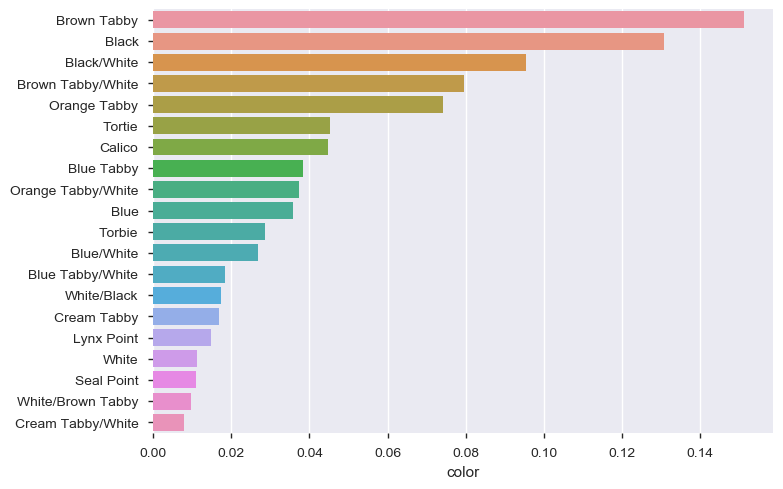

In [53]:
# Оставим топ20 цветов
sns.barplot(x=data_cat.color.value_counts().head(20)/len(data_cat.color), y=data_cat.color.value_counts().head(20).index)
plt.show()

In [67]:
data_cat_col = data_cat10.groupby('color').filter\
(lambda x: len(x) >= top_20_cat_colors.min())
data_cat_col = data_cat_col.loc[data_cat_col['sex_upon_outcome'] != 'Unknown']
data_cat_col


,breed,color,outcome_type,sex_upon_outcome,age
0,Domestic Shorthair Mix,Orange Tabby,Transfer,Intact Male,0.041096
8,Domestic Shorthair Mix,Blue Tabby/White,Adoption,Intact Female,0.161644
9,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,0.260274
10,Domestic Medium Hair Mix,Black/White,Return to Owner,Spayed Female,1.002740
17,Domestic Shorthair Mix,Black/White,Transfer,Intact Male,0.065753
...,...,...,...,...,...
78231,American Shorthair Mix,Blue Tabby/White,Adoption,Intact Female,0.238356
78232,Domestic Shorthair Mix,Brown Tabby/White,Adoption,Intact Male,0.142466
78233,Domestic Shorthair Mix,Brown Tabby,Transfer,Neutered Male,1.005479
78236,Domestic Shorthair Mix,Tortie,Adoption,Spayed Female,0.515068


In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
breed_tr = encoder.fit_transform(data_cat_col.breed)
color_tr = encoder.fit_transform(data_cat_col.color)


outcome_type_tr = encoder.fit_transform(data_cat_col.outcome_type)
sex_upon_outcome_tr = encoder.fit_transform(data_cat_col.sex_upon_outcome)

In [69]:
data_cat_col.breed = breed_tr
data_cat_col.color = color_tr


data_cat_col.outcome_type = outcome_type_tr
data_cat_col.sex_upon_outcome = sex_upon_outcome_tr
data_cat_col.age = data_cat_col.age.apply(lambda x: round(x, 2))
data_cat_col

,breed,color,outcome_type,sex_upon_outcome,age
0,5,11,7,1,0.04
8,5,4,0,0,0.16
9,5,17,0,3,0.26
10,3,1,5,3,1.00
17,5,1,7,1,0.07
...,...,...,...,...,...
78231,0,4,0,0,0.24
78232,5,7,0,1,0.14
78233,5,6,7,2,1.01
78236,5,15,0,3,0.52


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(data_cat_col.drop(['outcome_type'], axis=1), \
                                                    data_cat_col.outcome_type, train_size=0.3)

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


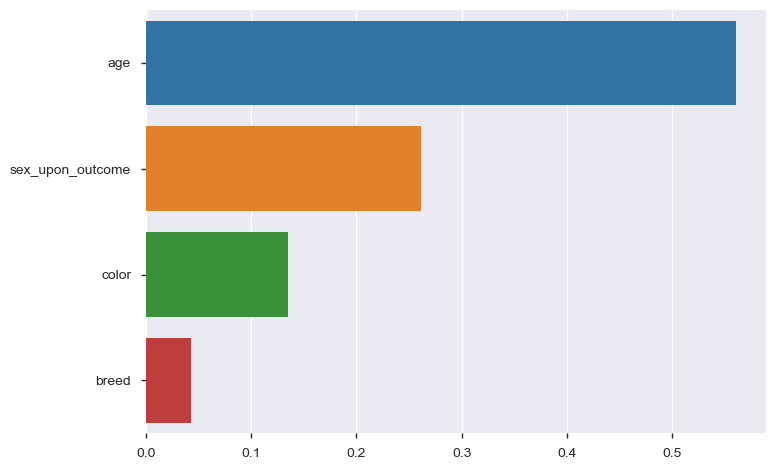

In [72]:
feature_imp = pd.Series(model.feature_importances_, index=x_train.columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()


Интуитивно результат похож на правду!

In [73]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      7830
           1       0.05      0.02      0.03       208
           2       0.00      0.00      0.00         4
           3       0.19      0.09      0.12       739
           4       0.00      0.00      0.00        16
           5       0.19      0.11      0.14       855
           6       0.00      0.00      0.00        19
           7       0.68      0.74      0.71      6852

    accuracy                           0.69     16523
   macro avg       0.23      0.22      0.22     16523
weighted avg       0.66      0.69      0.68     16523



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Для проверки проделаем те же манипулиции с топ-10 собак

In [74]:
top_dogs_breeds = data_dog.breed.value_counts().head(10)
data_dog10 = data_dog.groupby('breed').filter(lambda x: len(x) >= top_dogs_breeds.min())\
.drop(['animal_type', 'animal_id', 'date_of_birth', 'datetime', 'age_upon_outcome', 'name', 'outcome_subtype'], axis=1)
data_dog10

,breed,color,outcome_type,sex_upon_outcome,age
7,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,3.043836
14,Labrador Retriever Mix,Black,Return to Owner,Neutered Male,8.027397
16,Pit Bull Mix,Brown Brindle/White,Transfer,Neutered Male,1.098630
27,Labrador Retriever Mix,Yellow,Adoption,Spayed Female,0.216438
28,Chihuahua Shorthair Mix,Blue/Tan,Transfer,Intact Female,0.383562
...,...,...,...,...,...
78246,Chihuahua Shorthair Mix,Black/Tan,Adoption,Neutered Male,2.219178
78247,Border Collie Mix,Black/White,Return to Owner,Spayed Female,2.254795
78248,German Shepherd Mix,Tan/Black,Return to Owner,Intact Female,1.997260
78249,Border Collie Mix,Black/Gray,Return to Owner,Neutered Male,2.254795


In [78]:
top_20_dog_colors = data_dog.color.value_counts().head(20)
data_dog_col = data_dog10.groupby('color').filter\
(lambda x: len(x) >= top_20_dog_colors.min())

data_dog_col = data_dog_col.loc[data_dog_col['sex_upon_outcome'] != 'Unknown']
data_dog_col


,breed,color,outcome_type,sex_upon_outcome,age
7,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,3.043836
14,Labrador Retriever Mix,Black,Return to Owner,Neutered Male,8.027397
16,Pit Bull Mix,Brown Brindle/White,Transfer,Neutered Male,1.098630
32,Labrador Retriever Mix,Tan/White,Adoption,Spayed Female,0.260274
34,Labrador Retriever Mix,Black/White,Adoption,Neutered Male,12.178082
...,...,...,...,...,...
78229,Labrador Retriever Mix,Tan/White,Adoption,Spayed Female,2.145205
78230,Labrador Retriever Mix,Black/White,Adoption,Intact Female,2.046575
78246,Chihuahua Shorthair Mix,Black/Tan,Adoption,Neutered Male,2.219178
78247,Border Collie Mix,Black/White,Return to Owner,Spayed Female,2.254795


In [79]:
encoder_d = LabelEncoder()
breed_trd = encoder_d.fit_transform(data_dog_col.breed)
color_trd = encoder_d.fit_transform(data_dog_col.color)


outcome_type_trd = encoder_d.fit_transform(data_dog_col.outcome_type)
sex_upon_outcome_trd = encoder_d.fit_transform(data_dog_col.sex_upon_outcome)

In [80]:
data_dog_col.breed = breed_trd
data_dog_col.color = color_trd


data_dog_col.outcome_type = outcome_type_trd
data_dog_col.sex_upon_outcome = sex_upon_outcome_trd
data_dog_col.age = data_dog_col.age.apply(lambda x: round(x, 2))
data_dog_col

,breed,color,outcome_type,sex_upon_outcome,age
7,4,4,7,3,3.04
14,7,0,5,2,8.03
16,9,5,7,2,1.10
32,7,8,0,3,0.26
34,7,2,0,2,12.18
...,...,...,...,...,...
78229,7,8,0,3,2.15
78230,7,2,0,0,2.05
78246,4,1,0,2,2.22
78247,1,2,5,3,2.25


In [81]:
xd_train, xd_test, yd_train, yd_test = train_test_split(data_dog_col.drop(['outcome_type'], axis=1), \
                                                    data_dog_col.outcome_type, train_size=0.3)
model_d = RandomForestClassifier(n_estimators=100)
model_d.fit(xd_train, yd_train)

RandomForestClassifier()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


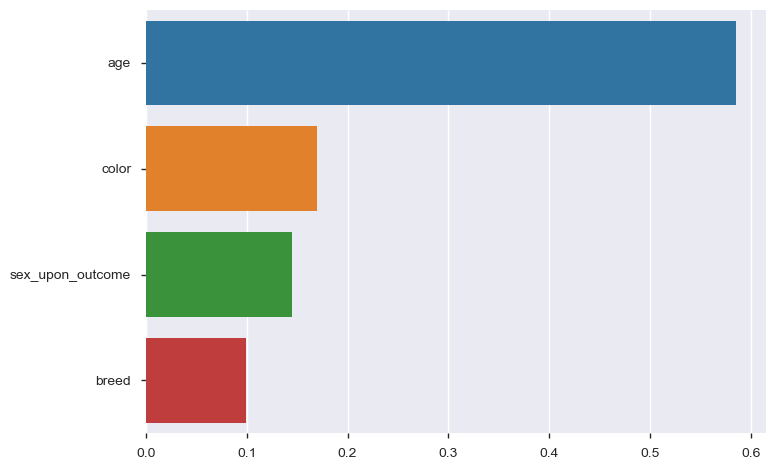

In [82]:
feature_imp_d = pd.Series(model_d.feature_importances_, index=xd_train.columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imp_d, y=feature_imp_d.index)
plt.show()


In [83]:
model_d_pred = model_d.predict(xd_test)
print(classification_report(yd_test, model_d_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67      4248
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00         2
           3       0.11      0.08      0.09       381
           4       0.00      0.00      0.00         3
           5       0.47      0.45      0.46      2771
           6       0.00      0.00      0.00        32
           7       0.44      0.39      0.41      1995

    accuracy                           0.53      9469
   macro avg       0.21      0.20      0.20      9469
weighted avg       0.52      0.53      0.53      9469

